<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/CNN_Real_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
data = '/content/drive/MyDrive/Data sets/real images'

In [3]:
os.listdir(data)

['test', 'train']

In [4]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from matplotlib.image import imread

In [6]:
test_path = data+'/test/'

In [7]:
train_path = data+'/train/'

In [8]:
test_path

'/content/drive/MyDrive/Data sets/real images/test/'

In [9]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [10]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C99P60ThinF_IMG_20150918_141351_cell_141.png'

In [12]:
para_cell = train_path+'/parasitized/'+'C99P60ThinF_IMG_20150918_141351_cell_141.png'

In [13]:
para_cell

'/content/drive/MyDrive/Data sets/real images/train//parasitized/C99P60ThinF_IMG_20150918_141351_cell_141.png'

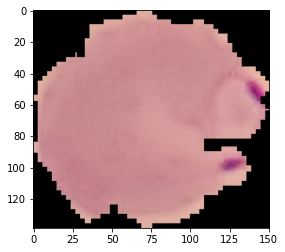

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path+'uninfected')[0]

'C90P51ThinF_IMG_20150821_115056_cell_199.png'

In [16]:
uninfected_cell = (train_path+'/uninfected/'+'C90P51ThinF_IMG_20150821_115056_cell_199.png')

In [17]:
uninfected_cell

'/content/drive/MyDrive/Data sets/real images/train//uninfected/C90P51ThinF_IMG_20150821_115056_cell_199.png'

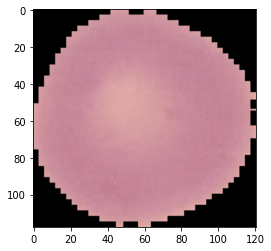

In [18]:
plt.imshow(imread(uninfected_cell))

In [19]:
pwd

'/content'

In [20]:
len(os.listdir(train_path+'parasitized'))

12480

In [21]:
len(os.listdir(train_path+'uninfected'))

12489

In [22]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):

  img = imread(test_path+'uninfected/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


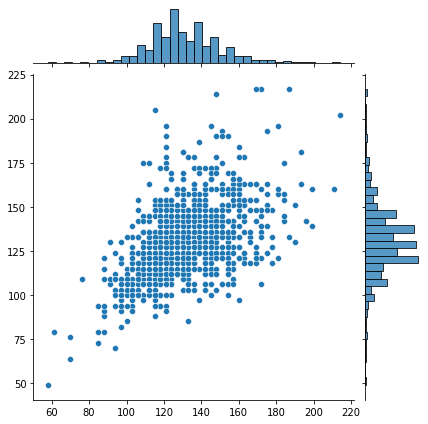

In [23]:
sns.jointplot(dim1,dim2)

In [24]:
np.mean(dim1)

130.92538461538462

In [25]:
np.mean(dim2)

130.75

In [26]:
my_image = (130,130,3)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
#help(ImageDataGenerator)

In [29]:
imread(para_cell).max()

0.9411765

In [30]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

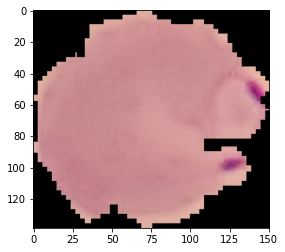

In [31]:
para_img = imread(para_cell)
plt.imshow(para_img)

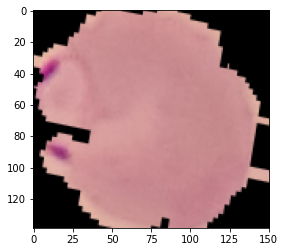

In [32]:
plt.imshow(image_gen.random_transform(para_img))

In [33]:
image_gen.flow_from_directory(train_path)

Found 24967 images belonging to 2 classes.


In [34]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Flatten,Conv2D,Dense,Dropout

In [36]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size = 16

In [40]:
train_img_gen = image_gen.flow_from_directory(train_path
                                                ,target_size=my_image[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24967 images belonging to 2 classes.


In [49]:
test_img_gen = image_gen.flow_from_directory(test_path
                                                ,target_size=my_image[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 2600 images belonging to 2 classes.


In [42]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
#model.fit(train_img_gen,epochs=5,
                              #validation_data=test_img_gen,
                              #callbacks=[early_stop])

I have already trained the model and saved it.. now i am using the same model for prediction.


In [44]:
model.save('trained_cnn_real_images')

INFO:tensorflow:Assets written to: trained_cnn_real_images/assets


In [45]:
import tensorflow as tf

In [46]:
new_model = tf.keras.models.load_model('trained_cnn_real_images')

In [50]:
new_model.evaluate(test_img_gen)

163/163 [==============================] - 462s 3s/step - loss: 5.0508 - accuracy: 0.4669


[5.050814151763916, 0.4669230878353119]

In [51]:
new_model.metrics_names

['loss', 'accuracy']

In [52]:
pred = new_model.predict(test_img_gen)

In [53]:
predictions = pred>0.5

In [54]:
predictions

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [55]:
len(pred)

2600

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.73      0.60      1300
           1       0.50      0.27      0.35      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.47      2600
weighted avg       0.50      0.50      0.47      2600



In [77]:
print(confusion_matrix(test_img_gen.classes,predictions))

[[952 348]
 [947 353]]


In [78]:
para_cell

'/content/drive/MyDrive/Data sets/real images/train//parasitized/C99P60ThinF_IMG_20150918_141351_cell_141.png'

In [86]:
from tensorflow.keras.preprocessing import image

In [87]:
image1 = image.load_img(para_cell,target_size=my_image)

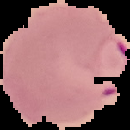

In [88]:
image1

In [69]:
new_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8f0436ae50>>

In [89]:
image_arr = image.img_to_array(image1)

In [90]:
image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [91]:
image_arr.shape

(130, 130, 3)

In [92]:
image_arr = np.expand_dims(image_arr,axis=0)

In [94]:
image_arr.shape

(1, 130, 130, 3)

In [95]:
new_model.predict(image_arr)

array([[0.4467655]], dtype=float32)

In [96]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}